# **Web Scraping and Text Analysis**

 **BY Fierdy Pandu Setiawan**
    | [Linkedin](https://www.linkedin.com/in/fpandu/) | [Medium](https://medium.com/@lightkun) |      

# 1. Introduction

Web scraping, text analysis, sentiment analysis, bigram, and trigram are all important techniques in
natural language processing. Web scraping is the process of extracting data from websites, which
is useful for collecting data to perform text analysis. Text analysis is the process of extracting
meaningful information from text data, such as identifying patterns or sentiments. Sentiment
analysis is a type of text analysis that involves determining the emotional tone of a piece of text.        

Bigrams and trigrams are types of n-grams, which are sequences of n words from a given text.
Bigrams are sequences of two words, while trigrams are sequences of three words. These can be
useful for identifying patterns in language use or for training language models.
One application of these techniques is in analyzing reviews of products or services. For example,
we can use web scraping to collect reviews of a particular airport, such as Soekarno-Hatta International Airport, from
websites like TripAdvisor or Airline Quality. Once we have collected the reviews, we can use text
analysis to identify patterns in the language used by customers. This might include identifying
frequently used words or phrases, or identifying common complaints or praises.          

We can also use sentiment analysis to determine the overall emotional tone of the reviews. This can
help us identify trends in customer satisfaction or dissatisfaction, which can be useful for improving
customer service or making other changes to the airport’s operations.       

Now, let’s take an example of a project that uses web scraping, text analysis, and sentiment analysis.
Suppose we want to analyze customer reviews of Soekarno-Hatta International Airport to understand their satisfaction
levels and identify any common complaints. We can use web scraping to extract the customer
reviews from the Soekarno-Hatta International Airport specific site, and then use text analysis techniques such as bigram
and trigram analysis to identify frequently occurring phrases and patterns in the text. Finally, we
can use sentiment analysis to classify each review as positive, negative, or neutral based on the
overall sentiment expressed in the text. This type of analysis can provide valuable insights into
customer satisfaction and help Soekarno-Hatta International Airport improve their services. Lets try to use data from
https://www.airlinequality.com/airport-reviews/jakarta-airport/.        



# 2. Data Preparation

## 2.1 Scraping Data

In this code, I will use several packages: requests, BeautifulSoup, and pandas. 

Firstly, I will use the requests package to send HTTP requests to the website and receive the
response. Then, I will use BeautifulSoup, a library for web scraping, to parse the HTML content
of the webpage and extract the text data from the reviews. Lastly, I will use pandas to create a
dataframe of the reviews.

The purpose of this code is to scrape reviews for Soekarno-Hatta International Airport from the website
airlinequality.com. The base_url is set to the Soekarno-Hatta International Airport page on the website, and
the variables pages and page_size are set to determine the number of pages and reviews to scrape.

In the for loop, I will iterate through the specified number of pages and collect the HTML data from
each page using requests.get(). Then, I will parse the content using BeautifulSoup, and extract the
review text from each “div” tag with class “text_content”. Finally, I will append the reviews to a
list, and print the total number of reviews collected after each iteration.     

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airport-reviews/jakarta-airport"
pages = 10
page_size = 1000

reviews = []

# Scraping the page to get the data
for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    
    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    # Collect HTML data from the chosen page
    response = requests.get(url)
    
    # Parsing the content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        # print(para.get_text())
        reviews.append(para.get_text())
    
    print(f" ---> {len(reviews)} total reviews")

Scraping page 1
 ---> 171 total reviews
Scraping page 2
 ---> 171 total reviews
Scraping page 3
 ---> 171 total reviews
Scraping page 4
 ---> 171 total reviews
Scraping page 5
 ---> 171 total reviews
Scraping page 6
 ---> 171 total reviews
Scraping page 7
 ---> 171 total reviews
Scraping page 8
 ---> 171 total reviews
Scraping page 9
 ---> 171 total reviews
Scraping page 10
 ---> 171 total reviews


In [5]:
# Save the result into dataframe
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Jakarta’s Soekarno-Hatta has...
1,Not Verified | I arrived in the airport at ni...
2,✅ Trip Verified | You can't transfer between ...
3,✅ Trip Verified | International terminal 3 is...
4,✅ Trip Verified | Most of the airport was hot...


# 3. Understanding The Data and its Pattern

After scrapping the data, we can use the data to get the insights

In [6]:
df

,reviews
0,✅ Trip Verified | Jakarta’s Soekarno-Hatta has...
1,Not Verified | I arrived in the airport at ni...
2,✅ Trip Verified | You can't transfer between ...
3,✅ Trip Verified | International terminal 3 is...
4,✅ Trip Verified | Most of the airport was hot...
...,...
166,Soekarno-Hatta has a good architecture inside ...
167,Very negative experience. Arrived around midni...
168,CGK can't be compared to Changi or KLIA howeve...
169,Transferred from a Garuda domestic to a Garuda...


There are 5 types of patterns in each text review that I must clean for the reviews:

a. "Trip Verified" words in every beginning of reviews. Example:        
✅ Trip Verified | Jakarta’s Soekarno-Hatta has...

b. "Not Verified" words in every beginning of reviews. Example:        
Not Verified | I arrived in the airport at ni...

c. "Verified Review" words in every beginning of reviews. Example:        
✅ Verified Review | Check in Terminal 3 Jakarta - the newest terminal...

d. "Unverified" words in every beginning of reviews. Example:        
❎ Unverified | Jakarta Airport Terminal 3 is shockingly badly designed.

e. Data that directly into reviews. Example:        
Soekarno-Hatta has a good architecture inside ...       

# 4. Data Cleaning

Cleaning the data by removing unimportant parts and focusing on the important part of the data. The goal is to make clean data that is ready to be visualized.  

In [7]:
# Removing unimportant part of the review text with a function
def process_reviews(reviews):
    if reviews.startswith('✅ Trip Verified'):
        return reviews.split('|', 1)[1]
    elif reviews.startswith('Not Verified'):
        return reviews.split('|', 1)[1]
    elif reviews.startswith('✅ Verified Review'):
        return reviews.split('|', 1)[1]
    elif reviews.startswith('❎ Unverified'):
        return reviews.split('|', 1)[1]
    elif reviews.startswith('❎ Not Verified'):
        return reviews.split('|', 1)[1]
    else:
        return reviews

In [8]:
# Using the process_reviews functions for the 'reviews' column
df['reviews'] = df['reviews'].apply(process_reviews)

In [9]:
# Check the result
df.head()

,reviews
0,Jakarta’s Soekarno-Hatta has been for a coupl...
1,I arrived in the airport at night. The airpo...
2,You can't transfer between domestic and inte...
3,International terminal 3 is a boiling pot. ...
4,Most of the airport was hot. Only felt moder...


In [10]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

In [11]:
# Cleaning the text in the 'reviews' column
df['clean_reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,clean_reviews
0,Jakarta’s Soekarno-Hatta has been for a coupl...,Jakarta s Soekarno Hatta has been for a coupl...
1,I arrived in the airport at night. The airpo...,I arrived in the airport at night The airport...
2,You can't transfer between domestic and inte...,You can t transfer between domestic and inter...
3,International terminal 3 is a boiling pot. ...,International terminal is a boiling pot Air c...
4,Most of the airport was hot. Only felt moder...,Most of the airport was hot Only felt moderat...


In [12]:
import nltk
"""This punkt tokenizer divides a text into a list of sentences by using an␣
↪unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pandu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pandu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pandu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
# !pip install vaderSentiment       # Uncomment if working on place like google collab

In [14]:
#The nltk.corpus package defines a collection of corpus reader classes, 
# which can be used to access the contents of a diverse set of corpora.
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    # print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
            #print(tag[0])
            #print(pos_dict.get(tag[0]))
    return newlist

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Pandu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Pandu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
df['POS tagged'] = df['clean_reviews'].apply(token_stop_pos)
df.head()

,reviews,clean_reviews,POS tagged
0,Jakarta’s Soekarno-Hatta has been for a coupl...,Jakarta s Soekarno Hatta has been for a coupl...,"[(Jakarta, n), (Soekarno, n), (Hatta, n), (cou..."
1,I arrived in the airport at night. The airpo...,I arrived in the airport at night The airport...,"[(arrived, v), (airport, n), (night, n), (airp..."
2,You can't transfer between domestic and inte...,You can t transfer between domestic and inter...,"[(transfer, n), (domestic, a), (international,..."
3,International terminal 3 is a boiling pot. ...,International terminal is a boiling pot Air c...,"[(International, n), (terminal, n), (boiling, ..."
4,Most of the airport was hot. Only felt moder...,Most of the airport was hot Only felt moderat...,"[(airport, n), (hot, a), (felt, v), (moderatel..."


In [16]:
# Obtaining the stem words – Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [17]:
df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,clean_reviews,POS tagged,Lemma
0,Jakarta’s Soekarno-Hatta has been for a coupl...,Jakarta s Soekarno Hatta has been for a coupl...,"[(Jakarta, n), (Soekarno, n), (Hatta, n), (cou...",Jakarta Soekarno Hatta couple year home base...
1,I arrived in the airport at night. The airpo...,I arrived in the airport at night The airport...,"[(arrived, v), (airport, n), (night, n), (airp...",arrive airport night airport surprisingly em...
2,You can't transfer between domestic and inte...,You can t transfer between domestic and inter...,"[(transfer, n), (domestic, a), (international,...",transfer domestic international section with...
3,International terminal 3 is a boiling pot. ...,International terminal is a boiling pot Air c...,"[(International, n), (terminal, n), (boiling, ...",International terminal boil pot Air conditio...
4,Most of the airport was hot. Only felt moder...,Most of the airport was hot Only felt moderat...,"[(airport, n), (hot, a), (felt, v), (moderatel...",airport hot felt moderately cool quiet area ...


In [18]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Jakarta’s Soekarno-Hatta has been for a coupl...,Jakarta Soekarno Hatta couple year home base...
1,I arrived in the airport at night. The airpo...,arrive airport night airport surprisingly em...
2,You can't transfer between domestic and inte...,transfer domestic international section with...
3,International terminal 3 is a boiling pot. ...,International terminal boil pot Air conditio...
4,Most of the airport was hot. Only felt moder...,airport hot felt moderately cool quiet area ...
...,...,...
166,Soekarno-Hatta has a good architecture inside ...,Soekarno Hatta good architecture inside faci...
167,Very negative experience. Arrived around midni...,negative experience Arrived around midnight ...
168,CGK can't be compared to Changi or KLIA howeve...,CGK compare Changi KLIA however pleasantly s...
169,Transferred from a Garuda domestic to a Garuda...,Transferred Garuda domestic Garuda internati...


In [19]:
# !pip install vaderSentiment  # Uncomment if using platforms like Google Collab

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'

In [21]:
# Calculate the vader sentiment
df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# Analyze the word
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,clean_reviews,POS tagged,Lemma,Sentiment,Analysis
0,Jakarta’s Soekarno-Hatta has been for a coupl...,Jakarta s Soekarno Hatta has been for a coupl...,"[(Jakarta, n), (Soekarno, n), (Hatta, n), (cou...",Jakarta Soekarno Hatta couple year home base...,0.4019,Neutral
1,I arrived in the airport at night. The airpo...,I arrived in the airport at night The airport...,"[(arrived, v), (airport, n), (night, n), (airp...",arrive airport night airport surprisingly em...,0.5267,Positive
2,You can't transfer between domestic and inte...,You can t transfer between domestic and inter...,"[(transfer, n), (domestic, a), (international,...",transfer domestic international section with...,-0.8309,Negative
3,International terminal 3 is a boiling pot. ...,International terminal is a boiling pot Air c...,"[(International, n), (terminal, n), (boiling, ...",International terminal boil pot Air conditio...,-0.6808,Negative
4,Most of the airport was hot. Only felt moder...,Most of the airport was hot Only felt moderat...,"[(airport, n), (hot, a), (felt, v), (moderatel...",airport hot felt moderately cool quiet area ...,0.6369,Positive


In [22]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    92
Negative    58
Neutral     21
Name: Analysis, dtype: int64

In [23]:
# Create the following data frame as a benchmark as ready-clean data
clean_df = pd.DataFrame(df['Lemma'].tolist(), columns=['reviews'])
clean_df

,reviews
0,Jakarta Soekarno Hatta couple year home base...
1,arrive airport night airport surprisingly em...
2,transfer domestic international section with...
3,International terminal boil pot Air conditio...
4,airport hot felt moderately cool quiet area ...
...,...
166,Soekarno Hatta good architecture inside faci...
167,negative experience Arrived around midnight ...
168,CGK compare Changi KLIA however pleasantly s...
169,Transferred Garuda domestic Garuda internati...


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Initiate object to CountVectorizer
vectorizer = CountVectorizer()

# Transform 'reviews' data to vector
X = vectorizer.fit_transform(clean_df['reviews'])

# Count how many the word appear then sorted descending order
word_counts = dict(zip(vectorizer.get_feature_names(), X.sum(axis=0).tolist()[0]))
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# print the top ten the word in terms of appearance in the review for checking
print(sorted_word_counts[:10])

[('airport', 301), ('terminal', 258), ('immigration', 110), ('time', 90), ('check', 87), ('area', 74), ('arrival', 74), ('gate', 73), ('jakarta', 72), ('flight', 70)]


c:\Users\Pandu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
# Save the list of sorted word count into Pandas dataframe
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
df_word_counts = pd.DataFrame(sorted_word_counts, columns=['Word', 'Frequency'])
df_word_counts

,Word,Frequency
0,airport,301
1,terminal,258
2,immigration,110
3,time,90
4,check,87
...,...,...
1927,yell,1
1928,yellow,1
1929,yesterday,1
1930,youth,1


# 5. Data Exploration

Import Seaborn and Matplotlib for analyzing data further

In [26]:
import re
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from nltk import ngrams
from collections import Counter

In [27]:
# Preprocessing text
clean_df['clean_reviews'] = clean_df['reviews'].apply(
    lambda x: re.sub(r'[^\w\s]','',x.lower()))

# Tokenization
clean_df['tokens'] = clean_df['clean_reviews'].apply(lambda x: x.split())

# Bigram
clean_df['bigrams'] = clean_df['tokens'].apply(
    lambda x: [x[i] + " " + x[i+1] for i in range(len(x)-1)])

# Counting bigram frequency
bigram_freq = Counter([item for sublist in clean_df['bigrams'] for item in sublist])

# Creating DataFrame for top 15 bigrams
bigrams_df = pd.DataFrame(bigram_freq.most_common(), columns=['Bigram', 'Frequency'])
bigrams_df

,Bigram,Frequency
0,new terminal,24
1,jakarta airport,24
2,baggage claim,19
3,security check,18
4,soekarno hatta,16
...,...,...
8071,friendly enviromnment,1
8072,enviromnment reasonably,1
8073,reasonably price,1
8074,price good,1


In [28]:
# create trigrams
trigrams_list = []
for review in clean_df['reviews']:
    review_trigrams = ngrams(review.split(), 3)
    trigrams_list.extend(review_trigrams)

# count trigrams and create dataframe
trigrams_counts = Counter(trigrams_list)
trigrams_df = pd.DataFrame.from_dict(trigrams_counts, orient='index', columns=['Frequency'])
trigrams_df.index = trigrams_df.index.map(' '.join)
trigrams_df.index.name = 'Trigram'
trigrams_df = trigrams_df.reset_index()

# sort by frequency
trigrams_df = trigrams_df.sort_values('Frequency', ascending=False)

# reset index
trigrams_df = trigrams_df.reset_index(drop=True)
trigrams_df

,Trigram,Frequency
0,security check point,5
1,duty free shop,5
2,Jakarta Soekarno Hatta,4
3,terminal domestic flight,4
4,terminal Jakarta Airport,3
...,...,...
9165,Terminal since day,1
9166,use Terminal since,1
9167,improvement happen Indonesia,1
9168,make improvement happen,1


## Data Visualization

Using data that has been created, using functions such as vader_counts, I will create visualizations using seaborn.

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks') # set background color to white
sns.set_palette('pastel') # set palette color to 'pastel'

Creating Pie Chart and Bar Plot

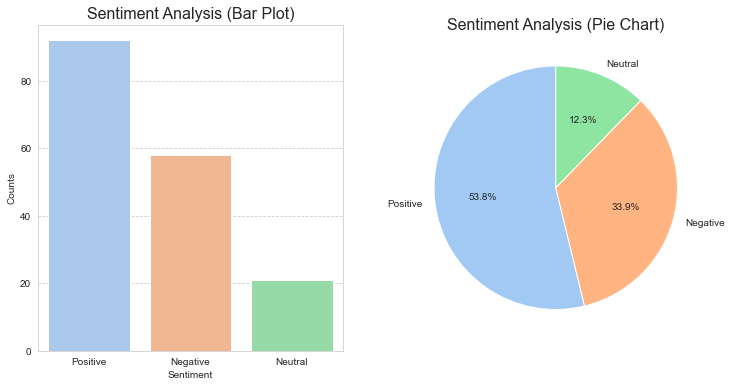

In [36]:
# Create a figure and 2 axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Drawing a Barplots in the first axes
sns.barplot(x=vader_counts.index, y=vader_counts.values, ax=ax1)
ax1.set_title('Sentiment Analysis (Bar Plot)', fontsize=16)
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Counts')

# Drawing pie chart in the second axes
labels = vader_counts.index
sizes = vader_counts.values
# explode = (0, 0, 0.1) # create 'explode' effect for the first slice
# ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Sentiment Analysis (Pie Chart)', fontsize=16)


plt.show()

Visualize the **Bigram**, **Words Count**, **Trigram**

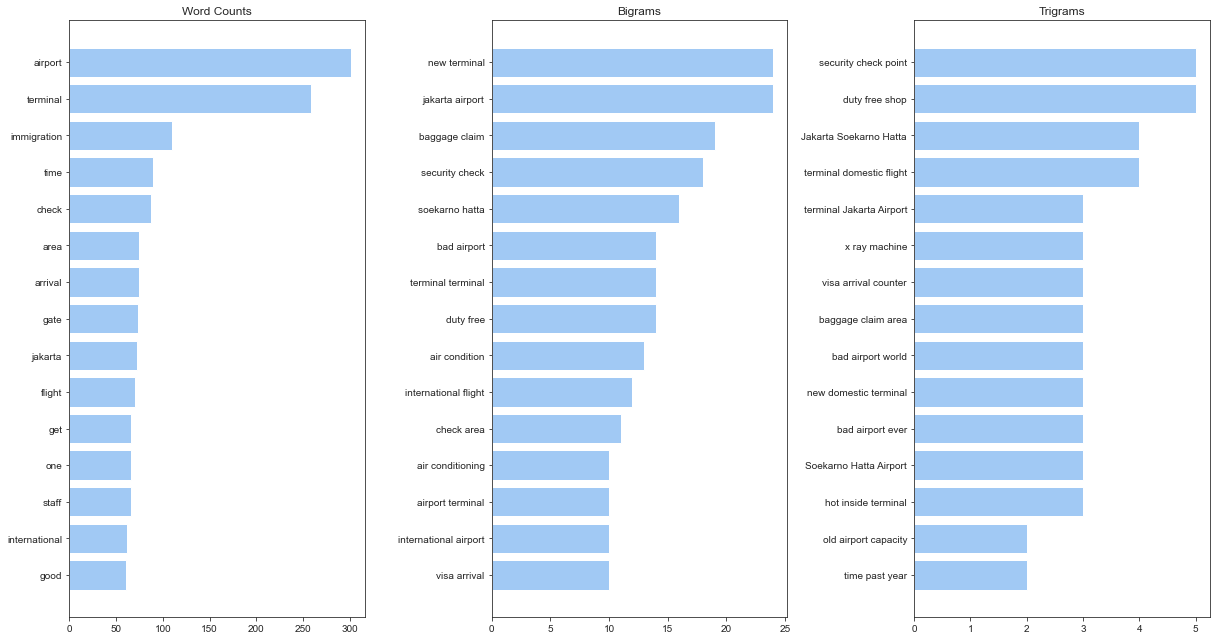

In [31]:
plt.figure(figsize=(17,9))

# Data frame word counts for first plot
plt.subplot(1, 3, 1)
plt.barh(df_word_counts['Word'][:15], df_word_counts['Frequency'][:15])
plt.gca().invert_yaxis() # split y axis to visualize from the bigger frequency
plt.title('Word Counts')

# Data frame bigram for 2nd plot
plt.subplot(1, 3, 2)
plt.barh(bigrams_df['Bigram'][:15], bigrams_df['Frequency'][:15])
plt.gca().invert_yaxis() # split y axis to visualize from the bigger frequency
plt.title('Bigrams')

# Data frame trigram for the last plot
plt.subplot(1, 3, 3)
plt.barh(trigrams_df['Trigram'][:15], trigrams_df['Frequency'][:15])
plt.gca().invert_yaxis() # split y axis to visualize from the bigger frequency
plt.title('Trigrams')
plt.tight_layout() # making distance between sub plot


plt.show()

Make a more easy to see visualization

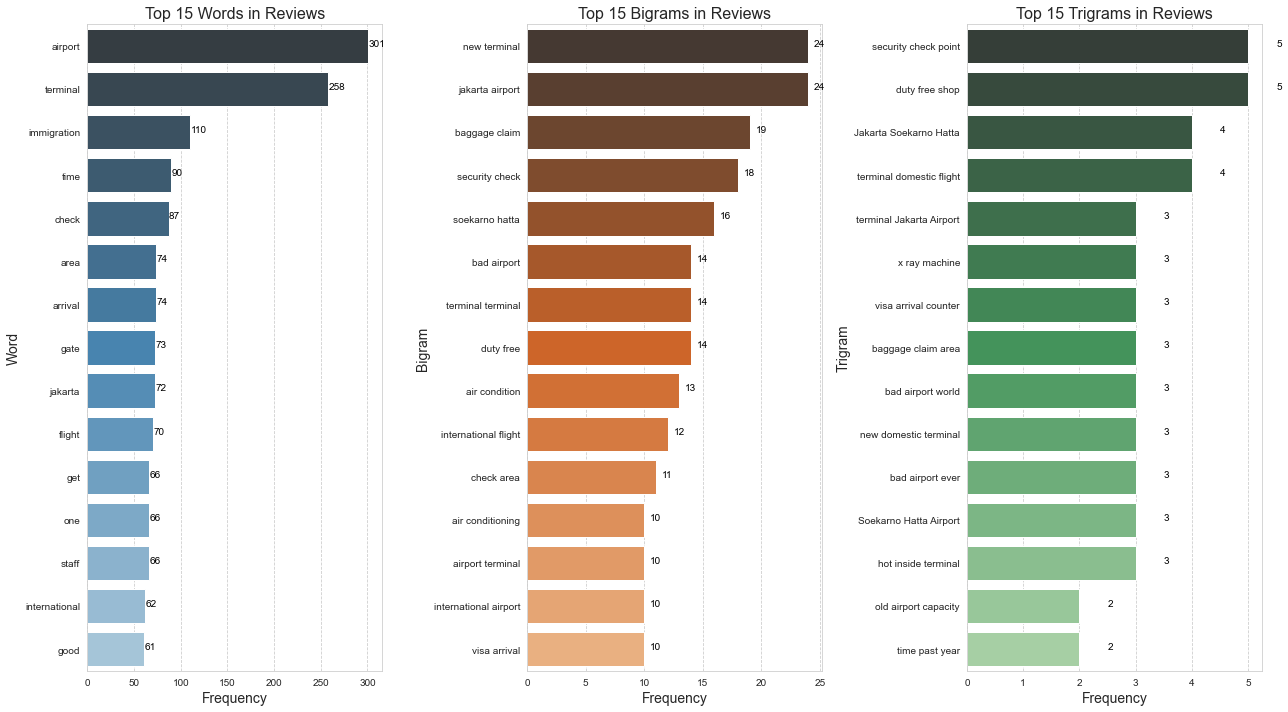

In [32]:
# setting how many rows or data will be visualized
top_words = df_word_counts.nlargest(15, 'Frequency')
top_bigrams = bigrams_df.nlargest(15, 'Frequency')
top_trigrams = trigrams_df.nlargest(15, 'Frequency')

# Create figure
plt.figure(figsize=(18,10))
sns.set_style("whitegrid", {'grid.linestyle': '--', 'alpha': 0.5})

# Data frame word counts for first plot
plt.subplot(1, 3, 1)
sns.barplot(x='Frequency', y='Word', data=top_words, palette= sns.color_palette("Blues_d", n_colors=15)[::-1])
plt.ylabel('Word', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 15 Words in Reviews', fontsize=16)

# Give anotation number for every bar
for i, v in enumerate(top_words['Frequency']):
    plt.text(v + 0.5, i, str(v), color='black', fontsize=10)

# Barplot for bigram
plt.subplot(1, 3, 2)
sns.barplot(x='Frequency', y='Bigram', data=top_bigrams, palette= sns.color_palette("Oranges_d", n_colors=15)[::-1])
plt.ylabel('Bigram', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 15 Bigrams in Reviews', fontsize=16)

# Give anotation number for every bar
for i, v in enumerate(top_bigrams['Frequency']):
    plt.text(v + 0.5, i, str(v), color='black', fontsize=10)

# Barplot for trigram
plt.subplot(1, 3, 3)
sns.barplot(x='Frequency', y='Trigram', data=top_trigrams, palette= sns.color_palette("Greens_d", n_colors=15)[::-1])
plt.ylabel('Trigram', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 15 Trigrams in Reviews', fontsize=16)

# Give anotation number for every bar
for i, v in enumerate(top_trigrams['Frequency']):
    plt.text(v + 0.5, i, str(v), color='black', fontsize=10)
    
plt.tight_layout() # making distance between sub plot

plt.show()

# 6. Conclusion

## Sentiment Analysis

**Sentiment Analysis** is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. The given data represents the results of sentiment analysis of text reviews on Soekarno-Hatta International Airport.   

**Out of all reviews, 92 were categorized as positive(53.8%), 58 were categorized as negative(33.9%), 21 were categorized as neutral(12.3%)**     

This indicates that travelers generally have a positive experience at the airport, with 53.8% of the reviews being positive. This suggests that many passengers appreciate the facilities, services, and overall environment provided by the airport.       

However, the negative reviews, accounting for 33.9% of the total, indicate that there is still a considerable number of passengers who have encountered issues, challenges, or inconveniences at the airport. These concerns could be related to various aspects such as cleanliness, staff behavior, security processes, waiting times, or other factors affecting the passenger experience.       

The neutral reviews, comprising 12.3% of the total, indicate that some passengers may not have had a strong opinion about the airport or experienced both positives and negatives that balanced each other out.     

Overall, while Soekarno-Hatta International Airport seems to receive predominantly positive feedback, it is crucial to address the negative and neutral reviews to identify areas for improvement and enhance the airport experience for all passengers. Airport management can use this information to target specific issues, make necessary changes, and work towards improving customer satisfaction.              

## Top 15 Words in reviews

From the top occurring words in the reviews for Soekarno-Hatta International Airport, the top occurring words indicate that passengers' primary experiences and concerns at Soekarno-Hatta International Airport involve the terminals, immigration process, time management, and specific airport areas. Airport management should focus on these aspects, analyze the sentiment associated with these words, and address the factors causing any negative experiences to improve overall customer satisfaction.       

## Top 15 Bigrams in reviews
https://en.wikipedia.org/wiki/Bigram

Based on the top bigrams found in the reviews for Soekarno-Hatta International Airport, the primary topics discussed in the reviews seem to revolve around the new terminal(24 frequencies), baggage claim process(19 frequencies), and security checks(18 frequencies). From bad reviews(14 frequencies) word pairs being in the top 5, Airport management should focus on these areas, analyze the sentiment associated with these bigrams, and identify the factors that may be causing any negative experiences to improve overall customer satisfaction.       

## Top 15 Trigrams in reviews
https://en.wikipedia.org/wiki/Trigram

Based on the top trigrams found in the reviews for Soekarno-Hatta International Airport, the primary topics discussed in the reviews are security check points, duty free shops, terminal experiences, and visa-on-arrival services. Additionally, there are negative sentiments regarding the airport's quality and temperature control. Airport management should focus on these areas, analyze the sentiment associated with these trigrams, and identify the factors that may be causing any negative experiences to improve overall customer satisfaction.     

# 7. Closing

In this project, we have conducted web scraping and text analysis on Soekarno-Hatta International Airport visitor reviews to gain a deeper understanding of their experiences. By using text analysis techniques such as web scraping, text analysis, sentiment analysis, bigram, and trigram, we were able to determine the messages and sentiments conveyed in the reviews and identify patterns in the language used. 